# Logistic Regression

### data: 성별 소득 data 에 따라 특정 구매자의 구매할지 여부를 예측

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, f1_score
from sklearn.metrics import accuracy_score, precision_score,\
                            recall_score, roc_curve, roc_auc_score
import seaborn as sns

df = pd.read_csv('datasets/Social_Network_Ads.csv')

In [3]:
# 데이터 확인
df.head() # 처음부터 확인

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
df.tail() # 끝에서 확인

,User ID,Gender,Age,EstimatedSalary,Purchased
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0
399,15594041,Female,49,36000,1


In [6]:
df['Purchased'].value_counts() # 예측 레이블이 편향 되었는지 확인하기 위해
# 50 50 으로 되어있으면 좋겠지만, 2대 1 정도면 많이 편향 된게 아님

0    257
1    143
Name: Purchased, dtype: int64

### Age, EstimatedSalary 를 변수로 선택

In [7]:
# 데이터 분류
# int로 넣어줘도 되지만 float 형태가 일반적이므로 변환
X = df.iloc[:, [2,3]].values.astype("float32") # age, estimatedSalary만 사용
y = df.iloc[:, 4].values.astype("float32") # purchased

X.shape, y.shape

((400, 2), (400,))

dataset 을 Training 과 Test set 으로 분리

In [9]:
# train, test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((320, 2), (80, 2), (320,), (80,))

## Feature Scaling

### train data 로 fit 하고, test data 는 train data 의 분포에 맞추어 transform

In [10]:
# age = 10단위, EstimatedSalaryy = 10000단위 
# => 숫자 차이가 큰데 이런 경우, 큰 숫자가 리딩하기 떄문에 스케일링 필요
sc = StandardScaler() # 인스턴스 생성
X_train = sc.fit_transform(X_train) # fit, transform을 따로 할 수도 있음
# transform 만 해야함 
# -> fit하면 별도로 데이터셋에 평균, 표준편차를 다시 계산하므로 미래의 데이터를 미리 계산하면 안됨
X_test  = sc.transform(X_test)

In [11]:
print(X_train.shape)

(320, 2)


### Logistic Regression model fitting

In [12]:
# fit
lr_clf = LogisticRegression(solver='lbfgs', random_state=0)
lr_clf.fit(X_train, y_train)

LogisticRegression(random_state=0)

### predict

- predict() - 예측된 class 반환 using X_test
- predict_proba() - class 당 probability 반환 using X_test

In [13]:
# predict : 예측된 class 반환
y_pred = lr_clf.predict(X_test)

# 평가
print("Test set의 실제 true 갯수 = ", sum(y_test)) # 22
print("모델이 예측한 true 갯수 = ", sum(y_pred)) #18
print("accuracy = {:.2f}".format(accuracy_score(y_test, y_pred))) # 0.925
print("precision = {:.2f}".format(precision_score(y_test, y_pred))) # 0.94
print("recall = {:.2f}".format(recall_score(y_test, y_pred))) # 0.77

Test set의 실제 true 갯수 =  22.0
모델이 예측한 true 갯수 =  18.0
accuracy = 0.93
precision = 0.94
recall = 0.77


In [14]:
# predict_proba : class 당 probability 반환
y_pred_proba = lr_clf.predict_proba(X_test)

print(y_pred_proba[:,1][:5]) # [0.12602436 0.17691062 0.2077208  0.10091478 0.10701443]

[0.12601942 0.17694095 0.20772811 0.10091521 0.10703347]


In [15]:
# predict는 0.5를 threshold로 했음을 확인할 수 있는 코드
sum((y_pred_proba[:, 1] > 0.5) == y_test)/len(y_test) # predict의 accuracy값과 동일
sum((y_pred_proba[:, 1] > 0.5) == y_test) # 몇개를 맞췄는지 개수 확인

74

In [26]:
y_pred_proba_1 = y_pred_proba[:, 1]

for threshold in np.arange(0.4,0.7,0.1):
    y_pred_2 = y_pred_proba_1 > threshold
    # threshold 증가시, accuracy : 감소, precision : 증가, recall : 감소
    print("threshold가 {}일 때 1 로 분류된 갯수: ".format(threshold), sum(y_pred_2))
    print("precision = {:.2f}".format(precision_score(y_test, y_pred_2)))
    print("recall = {:.2f}".format(recall_score(y_test, y_pred_2)))
    print("f1 score = ", f1_score(y_test, y_pred_2))
    print("-------------------------------------")

threshold가 0.4일 때 1 로 분류된 갯수:  23
precision = 0.83
recall = 0.86
f1 score =  0.8444444444444444
-------------------------------------
threshold가 0.5일 때 1 로 분류된 갯수:  18
precision = 0.94
recall = 0.77
f1 score =  0.85
-------------------------------------
threshold가 0.6일 때 1 로 분류된 갯수:  16
precision = 1.00
recall = 0.73
f1 score =  0.8421052631578947
-------------------------------------


## confusion matrix 를 이용한 model 평가

confution matrix
 [[17  5]
 [ 1 57]]


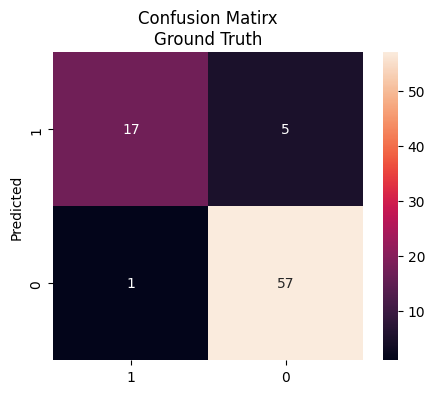

In [27]:
cm  = confusion_matrix(y_test, y_pred, labels=[1, 0])

print("confution matrix\n", cm)

plt.figure(figsize=(5,4))

ax = sns.heatmap(cm, annot=True, fmt='d', xticklabels=[1, 0], yticklabels=[1, 0])
ax.set_ylabel('Predicted')
ax.set_title('Confusion Matirx\nGround Truth')
None

## Visualization

roc_curve(y_true, y_score)  

fpr - false positive rates,  tpr - true positive rates

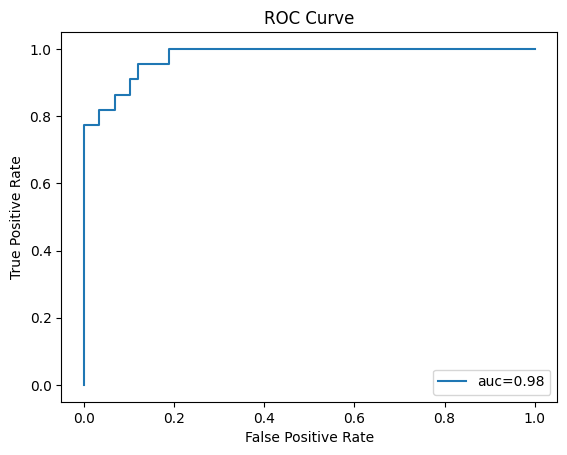

In [31]:
# Roc curve
y_proba = lr_clf.predict_proba(X_test)
y_scores = y_proba[:,1] # 전체 확률에 대해 1일 확률

# _ 사용해줘야함
fpr, tpr, _ = roc_curve(y_test, y_scores) # false positive rate : fpr, true positive rate : tpr
auc = roc_auc_score(y_test, y_scores)

plt.plot(fpr, tpr, label="auc="+ "{:.2f}".format(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

# 실습 

### 통신회사의 고객 이탈 여부를 logistic regression 으로 예측

In [33]:
churn_df = pd.read_csv("datasets/ChurnData.csv")

## Data pre-processing and feature selection

개별 feature 에 대한 분석 후(본 과정에서는 생략)에 Logistic Regression 에 사용할 feature 선정

tenure(가입기간), age (연령), income(수입) 으로 예측하고 churn (이탈여부) 은 integer 로 type 변경

In [34]:
churn_df.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0


In [35]:
churn_df = churn_df[['tenure', 'age', 'income', 'churn']]
churn_df['churn'] = churn_df['churn']
churn_df.head()

,tenure,age,income,churn
0,11.0,33.0,136.0,1.0
1,33.0,33.0,33.0,1.0
2,23.0,30.0,30.0,0.0
3,38.0,35.0,76.0,0.0
4,7.0,35.0,80.0,0.0


In [39]:
X = churn_df[['tenure', 'age', 'income']]
y = churn_df['churn']

### Train/Test dataset 분리

In [40]:
# train, test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((160, 3), (40, 3), (160,), (40,))

In [41]:
### data scaling
sc = StandardScaler() # 인스턴스 생성
X_train = sc.fit_transform(X_train) # fit, transform을 따로 할 수도 있음
X_test  = sc.transform(X_test)

print(X_train.shape) 

(160, 3)


In [42]:
# train the model
lr_clf = LogisticRegression(solver='lbfgs', random_state=0)
lr_clf.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [43]:
# predict : 예측된 class 반환
y_pred = lr_clf.predict(X_test)

# 평가
print("Test set의 실제 true 갯수 = ", sum(y_test))
print("모델이 예측한 true 갯수 = ", sum(y_pred))
print("accuracy = {:.2f}".format(accuracy_score(y_test, y_pred)))
print("precision = {:.2f}".format(precision_score(y_test, y_pred)))
print("recall = {:.2f}".format(recall_score(y_test, y_pred)))

Test set의 실제 true 갯수 =  9.0
모델이 예측한 true 갯수 =  8.0
accuracy = 0.78
precision = 0.50
recall = 0.44


Text(0.5, 1.0, 'Confusion Matirx')

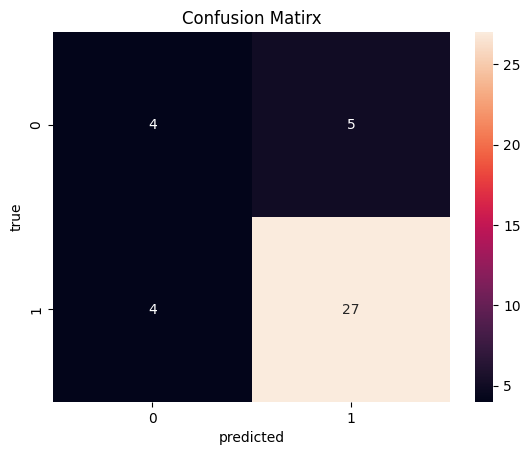

In [44]:
# confusion matrix 작성
cm  = confusion_matrix(y_test, y_pred, labels=[1, 0])

ax = sns.heatmap(cm, annot=True, fmt='d')
ax.set_ylabel('true') # 가로 세로 주의
ax.set_xlabel('predicted')
ax.set_title('Confusion Matirx')

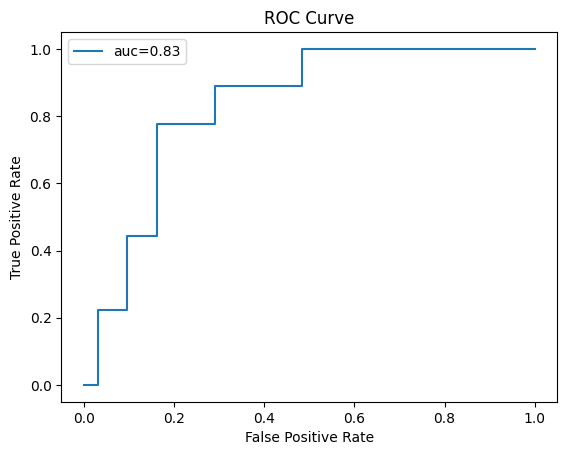

In [45]:
y_proba = lr_clf.predict_proba(X_test)
y_scores = y_proba[:,1] # 전체 확률에 대해 1일 확률

# _ 사용해줘야함
fpr, tpr, _ = roc_curve(y_test, y_scores) # false positive rate : fpr, true positive rate : tpr
auc = roc_auc_score(y_test, y_scores)

plt.plot(fpr, tpr, label="auc="+ "{:.2f}".format(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

In [53]:
# predict_proba : class 당 probability 반환
y_pred_proba = lr_clf.predict_proba(X_test)

print(y_pred_proba[:,1][:5])

[0.18933993 0.35648602 0.6001273  0.04857961 0.2984903 ]


In [54]:
y_pred_proba_1 = y_pred_proba[:, 1]

for threshold in np.arange(0.4,0.7,0.1):
    y_pred_2 = y_pred_proba_1 > threshold
    # threshold 증가시, accuracy : 감소, precision : 증가, recall : 감소
    print("threshold가 {}일 때 1 로 분류된 갯수: ".format(threshold), sum(y_pred_2))
    print("precision = {:.2f}".format(precision_score(y_test, y_pred_2)))
    print("recall = {:.2f}".format(recall_score(y_test, y_pred_2)))
    print("f1 score = ", f1_score(y_test, y_pred_2))
    print("-------------------------------------")

threshold가 0.4일 때 1 로 분류된 갯수:  13
precision = 0.54
recall = 0.78
f1 score =  0.6363636363636364
-------------------------------------
threshold가 0.5일 때 1 로 분류된 갯수:  8
precision = 0.50
recall = 0.44
f1 score =  0.47058823529411764
-------------------------------------
threshold가 0.6일 때 1 로 분류된 갯수:  3
precision = 0.67
recall = 0.22
f1 score =  0.3333333333333333
-------------------------------------


# Random Forest and Gradient Boosting

## Random Forest Classifier

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score

df = pd.read_csv('datasets/Social_Network_Ads.csv')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [6]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [7]:
X = df.iloc[:, [2,3]].values.astype("float32") # age, estimatedSalary
y = df.iloc[:, 4].values.astype("float32") # purchased

In [9]:
# train, test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((320, 2), (80, 2), (320,), (80,))

In [11]:
# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test  = sc.transform(X_test)

In [12]:
# Training set 에 대해 Random Forest Classifier model 을 fitting
rf = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)
rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [13]:
# predict
y_pred = rf.predict(X_test)

In [16]:
# accuracy
accuracy_score(y_test,y_pred)
print("accuracy = {:.2f}".format(sum(y_pred == y_test) / len(y_test)))

# f1 score
print("f1 score =", f1_score(y_test, y_pred, labels=[1, 0]))

accuracy = 0.91
f1 score = 0.8444444444444444


In [17]:
# confusion matrix
print("confution matrix\n", 
      confusion_matrix(y_test, y_pred, labels=[1, 0]))

confution matrix
 [[19  3]
 [ 4 54]]


## Gradient Boosting Classifier

- min_samples_split : node 분리에 필요한 최소 sample 수 => overfitting 방지  
- max_depth : tree 깊이 조절 => overfitting 방지
- learning_rate : 각 tree 의 기여도 조정, n_estimators 와 trade-off 
- n_estimators : number of sequential trees

In [18]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(learning_rate=0.1, 
                                n_estimators=500, max_depth=5)
gb.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=5, n_estimators=500)

In [20]:
y_pred = gb.predict(X_test)

print(y_pred)

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 1. 0. 1.
 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1.
 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0.
 0. 1. 0. 0. 0. 0. 1. 1.]


In [21]:
# accuracy
accuracy_score(y_test,y_pred)
print("accuracy = {:.2f}".format(sum(y_pred == y_test) / len(y_test)))

# f1 score
print("f1 score =", f1_score(y_test, y_pred, labels=[1, 0]))

accuracy = 0.93
f1 score = 0.8636363636363636


In [22]:
# making confusion matrix
print("confution matrix\n", 
      confusion_matrix(y_test, y_pred, labels=[1, 0]))

confution matrix
 [[19  3]
 [ 3 55]]


## Visualization of the Training result

In [23]:
from matplotlib.colors import ListedColormap

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])   
cmap_bold = ListedColormap(['#FF0000', '#00FF00'])    

In [24]:
# 가상의 데이터 생성 : 전체 레코드에 대해서 최소 최대 사용
x1_min, x1_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1       
x2_min, x2_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1  

# x1, x2가 서로 교차되는 점 마다 데이터를 생성해줌 -> meshgrid
X1, X2 = np.meshgrid(np.arange(x1_min, x1_max, 0.1), 
                     np.arange(x2_min, x2_max, 0.1))
X1.shape, X2.shape # (60, 61) / (60, 61)

# X1, X2를 1차원으로 펼쳐줘서 각 축의 값을 만듬                                 
XX = np.column_stack([X1.ravel(), X2.ravel()])
XX.shape # (3360,2)만큼의 가상데이터가 생성됨

(3660, 2)

In [25]:
# random forest로 예측한 값
Y_rf = np.array(rf.predict(XX))
# gradient boost로 예측한 값
Y_gb = np.array(gb.predict(XX))

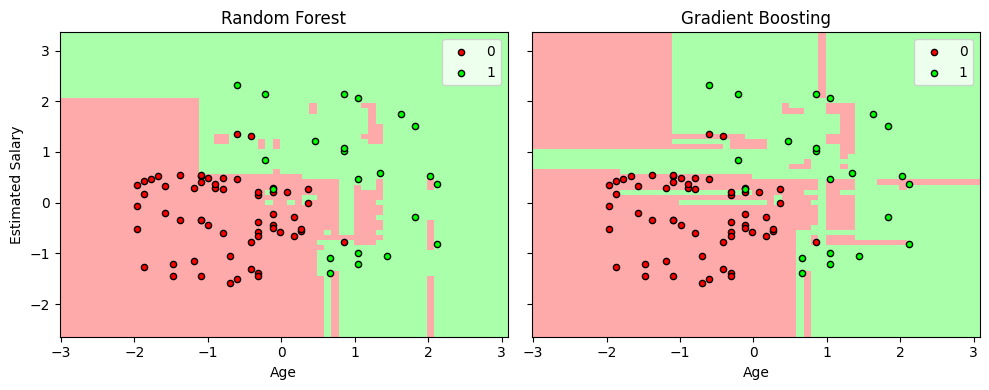

In [27]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4), sharey=True)

# Random Forest
ax1.pcolormesh(X1, X2, Y_rf.reshape(X1.shape), 
               cmap=cmap_light, shading='auto') 
for i in range(2):
    ax1.scatter(X_test[y_test == i, 0], X_test[y_test == i, 1], s=20, 
                color=cmap_bold(i), label=i, edgecolor='k')
ax1.set_title('Random Forest')
ax1.set_xlabel('Age')
ax1.set_ylabel('Estimated Salary')
ax1.legend()

# Gradient Boosting
ax2.pcolormesh(X1, X2, Y_gb.reshape(X1.shape), 
               cmap=cmap_light, shading='auto') 
for i in range(2):
    ax2.scatter(X_test[y_test == i, 0], X_test[y_test == i, 1], s=20, 
                color=cmap_bold(i), label=i, edgecolor='k')
ax2.set_title('Gradient Boosting')
ax2.set_xlabel('Age')
ax2.legend()
plt.tight_layout()

In [28]:
gb.feature_importances_       # Age, EstimatedSalary 의 중요도

array([0.49395817, 0.50604183])

In [29]:
feature_imp = pd.Series(gb.feature_importances_, 
            ['Age', 'EstimatedSalary']).sort_values(ascending=False)
feature_imp

EstimatedSalary    0.506042
Age                0.493958
dtype: float64

<Axes: title={'center': 'feature importance'}>

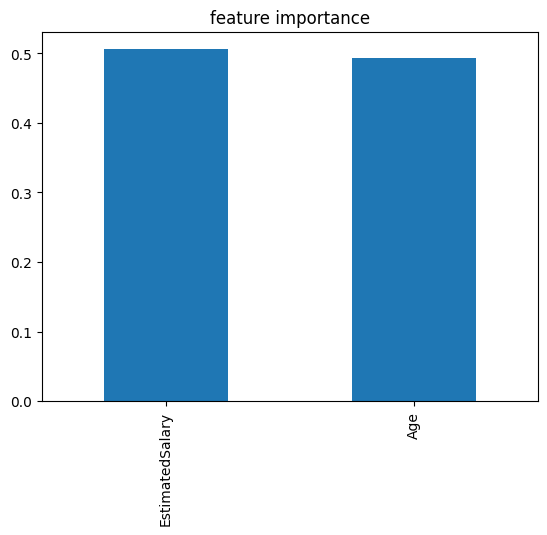

In [30]:
feature_imp.plot(kind='bar', title='feature importance')

# 실습 - Titanic 호 data 를 이용한 Feature Engineering 과 Modeling

Pclass - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)  $\rightarrow$ 객실 등급  
survival -  Survival (0 = 사망; 1 = 생존)  $\rightarrow$ 생존여부  
name - Name  
sex - Sex  
age - Age  
sibsp - Number of Siblings/Spouses Aboard  $\rightarrow$ 함께 탑승한 형제 또는 배우자 수   
parch - Number of Parents/Children Aboard  $\rightarrow$ 함께 탑승한 부모 또는 자녀 수  
ticket - Ticket Number  
fare - Passenger Fare (British pound)  
cabin - Cabin  $\rightarrow$ 선실번호  
embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)  $\rightarrow$ 탑승한 항구(얼마나 부유한지와 관련)

In [31]:
import warnings
warnings.filterwarnings("ignore")

In [36]:
df = pd.read_csv("datasets/titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [37]:
df.drop(['PassengerId', 'Name', 'Cabin', 'Ticket'], axis=1, inplace=True)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [39]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [40]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Feature Analysis

- feature 간의 correlation check

- Survived 와 각 Feature 간 상관관계 파악

In [41]:
# 각 피처들간의 관계가 얼마냐
# 음수 : 역의 상관관계, 0 : 거의 관계 없음, 양수 : 양의 상관관계
# cov 라는 공분산을 -1, 1 사이로 정규화 시킨 것
df.corr(numeric_only=True)

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


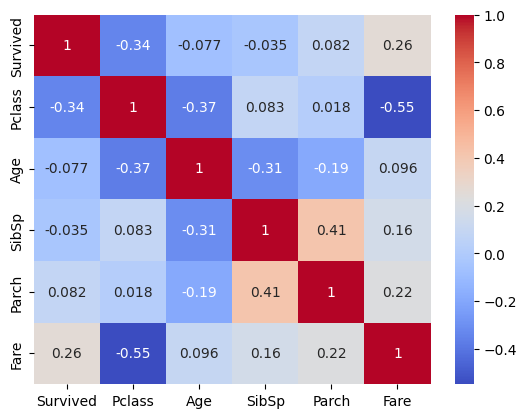

In [43]:
import seaborn as sns

# 상관관계 시각화
g = sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")

가장 양의 상관 관계가 높은 feature 는 Fare 이고 Pclass 는 가장 음의 상관관계가 높은 것으로 나타난다.

## Missing Value 처리

In [44]:
# Age -> median으 처리 : 없애기엔 너무 많기 때문
df['Age'].fillna(df['Age'].median(), inplace=True)

# Embarked -> 얼마 없어서 삭제
df.dropna(inplace=True)

In [45]:
df.shape

(889, 8)

891 개의 data 중 177 개를 drop 시키는 것은 너무 많은 양이므로 Age 는 median 으로 채워주고 Embarked 는 drop 시킨다.

In [46]:
df['Age'].fillna(df['Age'].median(), inplace=True)
df.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

## Data 의 skewness  check

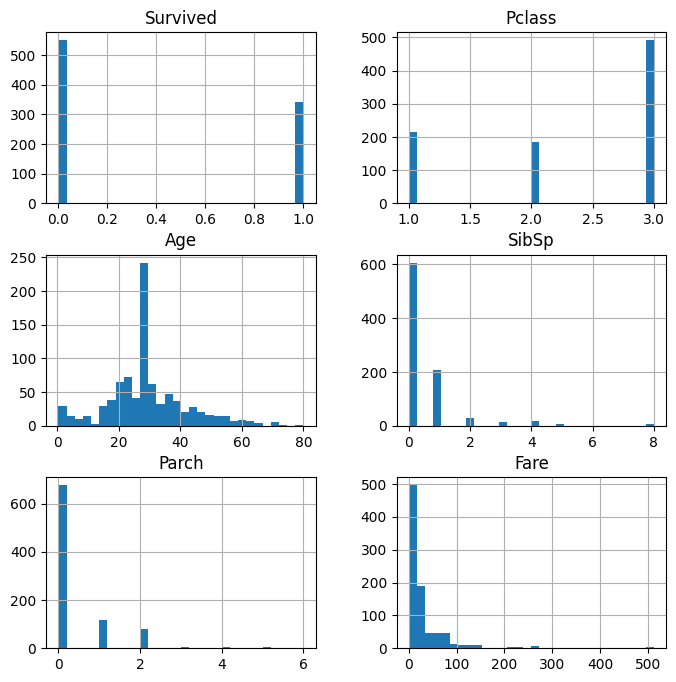

In [47]:
# 히스토그램을 이용해 분포를 확인해 편향 확인
df.hist(bins=30, figsize=(8, 8));

### Fare 의 분포가 심하게 skew 되어 있으므로 log 값으로 바꾸어 skewness 를 완화 시킨다.

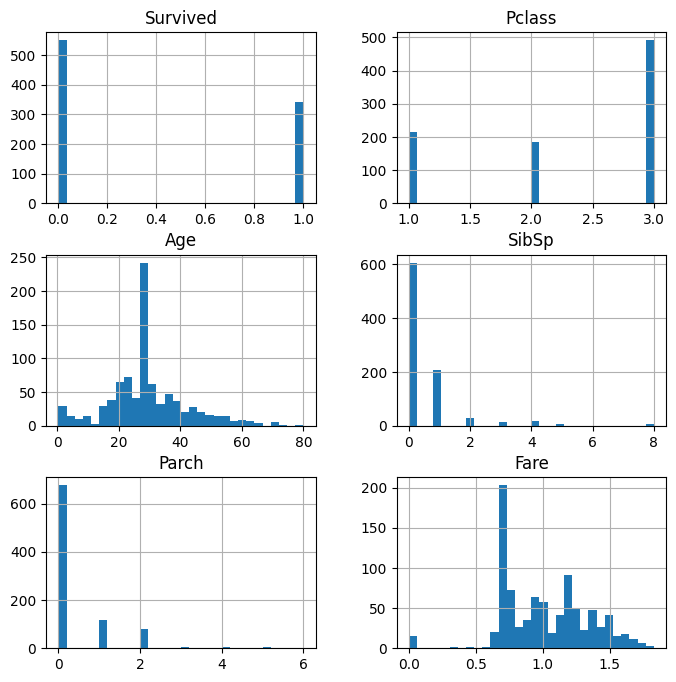

In [60]:
df['Fare'] = df['Fare'].map(lambda x: np.log(x) if x > 0 else 0)
df.hist(bins=30, figsize=(8, 8));

## Category 변수 처리

Category column 들을 one-hot-encoding 으로 변환한다.

In [61]:
# 원핫 인코딩 : 카테고리컬인 칼럼을 자동으로 골라서 바꿔줌
df_titanic = pd.get_dummies(df)
df_titanic.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,0.683603,0,1,0,0,1
1,1,1,38.0,1,0,1.450832,1,0,1,0,0
2,1,3,26.0,0,0,0.727559,1,0,0,0,1
3,1,1,35.0,1,0,1.379314,1,0,0,0,1
4,0,3,35.0,0,0,0.735091,0,1,0,0,1


## Train / Test dataset split

In [62]:
X_train = df_titanic[:700]
X_test  = df_titanic[700:]

In [63]:
y_train = X_train.pop('Survived')
y_test  = X_test.pop('Survived')

## Standard Scaling

In [64]:
from sklearn.preprocessing import StandardScaler

In [65]:
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

## Modeling

In [66]:
from sklearn.ensemble import RandomForestClassifier

# Training set 에 대해 Random Forest Classifier model 을 fitting
rf = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)
rf.fit(X_train_scaled, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [67]:
# 예측 : predict
y_pred = rf.predict(X_test_scaled)

In [68]:
# 정확도 
print("accuracy = {:.2f}".format(sum(y_pred == y_test) / len(y_test)))

accuracy = 0.85
